# EDA on Countries of the World
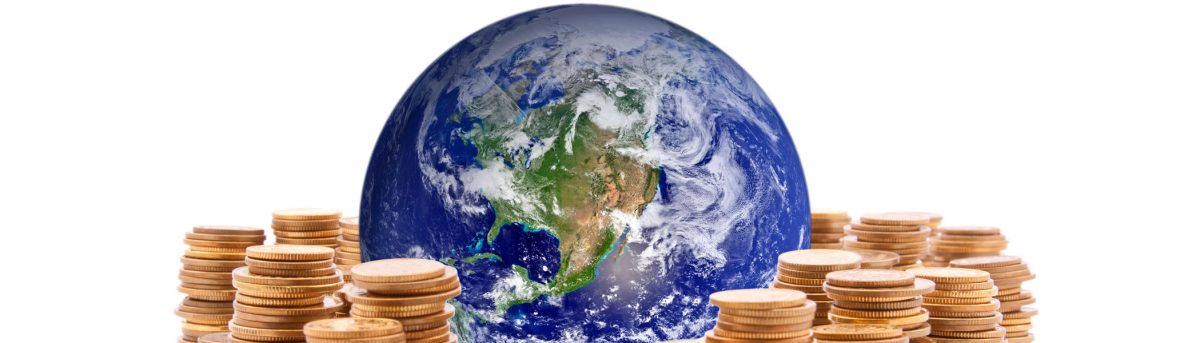

This notebook features:
- [Issues with data](#Quality)
- [Data Cleaning](#Cleaning-Data)
- [Cleaned Data](#Cleaned-Data)
- [Univariate Analysis](#Univariate-Analysis)
- [Multi Variate Analysis](#Multi-Variate-Analysis)
- [Conclusion](#Conclusion)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.listdir("../input/"))
# Any results you write to the current directory are saved as output.

In [ ]:
world_original=pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')

In [ ]:
world_original.head(10)

In [ ]:
world_original.sample(10)

In [ ]:
world_original.shape

In [ ]:
world_original.info()

In [ ]:
world_original.isnull().sum()

In [ ]:
world_original['Country'].nunique()

In [ ]:
world_original['Climate'].unique()

In [ ]:
world_original['Region'].unique()

In [ ]:
world_original.describe()

In [ ]:
world_original.columns

# **Quality**
*[Completeness, Validity, Accuracy, Consistency]*
* **There are 195 globally recognised states in the world, but the dataset contains 227 unique countries [Accuracy]**
* **There is whitespaces in Cols Country, Region [Consistency]**
* **Col Area is rounded off [Accuracy]**
* **Dots are reolaced with commas [validity]**
* **Missing values in col Net migration,Infant mortality (per 1000 births),GDP( per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service [Completeness]**
* **Data types for wrongly set [validity]**
* **Climate Col has float values [Consistency]**
* **Climate col has numbers instead of a climate name**
* **Region col has ambigous names like 'Near East'**


# **Tidiness**
* **Cols Birthrate, Deathrate, Agriculture, Industry, Service are missing units**
* **Some Cols name require renaming for better understanding**

# Cleaning Data

You should follow the order provided below:

- Completeness Issues
- Tidiness Issues

### Steps involved in Data cleaning

- Define
- Code 
- Test

`Always make sure to create a copy of your pandas dataframe before you start the cleaning process`

In [ ]:
world=world_original.copy()

### Define: There are 195 globally recognised states in the world, but the dataset contains 227 unique countries
#### **Solution:** This may be because some the countries are not recognised as a separate nation, like Taiwan & Macau, while others aren't self gover
ning. We let them be as it is in the dataset, as some of these countries have a totally different atmosphere than there mother nation.

### Define: There is whitespaces in Cols Country, Region
#### **Solution:** Remove white spaces.
### Code

In [ ]:
world['Country']=world['Country'].str.strip()
world['Region']=world['Region'].str.strip()

### Test

In [ ]:
world[['Country','Region']]

### Define: Col Area is rounded off
#### **Solution:** The accuracy lost cannot be inferred form the other columns. We will leave it as it is

### Define: Dots are reolaced with commas
#### **Solution:** Replace commas with dots
### Code

In [ ]:
world.replace(',', '.', regex=True,inplace=True)

### Test

In [ ]:
world

### Define: Region Col has ambigous names
#### **Solution:** Replace ambigous names with more suitable ones
### Code

In [ ]:
world['Region'].replace(['ASIA (EX. NEAR EAST)', 'NEAR EAST'], ['EASTERN ASIA','WESTERN ASIA'], regex=False,inplace=True)

### Test

In [ ]:
list(world['Region'].unique())

### Define: Data types for wrongly set
#### **Solution:** Set data types to numeric, category accordingly
### Code

In [ ]:
world[['Population','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service']]= world[['Population','Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Birthrate','Deathrate','Agriculture','Industry','Service']].apply(pd.to_numeric, errors='coerce')
world['Climate']=world['Climate'].astype('category')
world['Region']=world['Region'].astype('category')

### Test

In [ ]:
world.info()

### Define: Climate Col has float values
#### **Solution:** Hwre 2,5 does not a mixed climate of 2 and 5, rather it is a totally different column.
### Code

In [ ]:
world['Climate'].unique()
world['Climate'].replace(['1.5', '2.5'], ['5', '6'], regex=False,inplace=True)

### Test

In [ ]:
world['Climate'].unique()

### Define: Missing values in col Net migration,Infant mortality (per 1000 births),GDP( per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
#### **Solution:** Fill the cols which have less than 5 missing values from internet if possible, fill the rest of columns by mean of their Region.
### Code

In [ ]:
world[world['Net migration'].isnull()]

In [ ]:
world['Net migration'].loc[[47,221]]=-21.1
world['Net migration'].loc[[223]]=-4.9

In [ ]:
world[world['Infant mortality (per 1000 births)'].isnull()]

In [ ]:
world['Infant mortality (per 1000 births)'].loc[[47,221]]=12.6
world['Infant mortality (per 1000 births)'].loc[[223]]=50.5

In [ ]:
world[world['GDP ($ per capita)'].isnull()]

In [ ]:
world['GDP ($ per capita)'].loc[[223]]=2500.0

In [ ]:
world[(world['Phones (per 1000)'].isnull()) | (world['Arable (%)'].isnull()) | (world['Crops (%)'].isnull()) | (world['Other (%)'].isnull())]

In [ ]:
world['Phones (per 1000)'].loc[[52,58,140,223]]=[330.56,2.48,882.2,256.4]
world['Literacy (%)']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Literacy (%)']
world['Arable (%)']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Arable (%)']
world['Crops (%)']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Crops (%)']
world['Other (%)']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Other (%)']
world['Birthrate']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Birthrate']
world['Deathrate']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Deathrate']
world['Agriculture']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Agriculture']
world['Industry']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Industry']
world['Service']=world.groupby("Region").apply(lambda x: x.fillna(x.mean()))['Service']
world['Climate']=world.groupby("Region").apply(lambda x: x.fillna(world['Climate'].mode()[0]))['Climate']

### Test

In [ ]:
world.isnull().sum()

### Define: Cols Net migration, Birthrate, Deathrate, Agriculture, Industry, Service are missing units
#### **Solution:** Fill the cols which have less than 5 missing values from internet if possible, fill the rest of columns by mean of their Region.
### Code

In [ ]:
world.rename(columns={"Coastline (coast/area ratio)":"Coastline/Area (coast/area ratio)",'Net migration':'Net migration (per year)', 'Birthrate':'Birthrate (per 1000)', 'Deathrate':'Deathrate (per 1000)', 'Agriculture':'Agriculture (%)', 'Industry':'Industry (%)', 'Service':'Service (%)'},inplace=True)

### Test

In [ ]:
world.info()

# Cleaned Data

In [ ]:
world.info()

In [ ]:
world.head(10)

In [ ]:
world.sample(10)

# Univariate Analysis

In [ ]:
plt.style.use("fivethirtyeight")

* **Region**

In [ ]:
plt.subplots(figsize=(30,15))
sns.countplot(world['Region'],order=world['Region'].value_counts().index)
plt.show()

**Observations**
* Sub-Saharan Africa region has the higest number of countries
* Baltics region has the least number of countries

* **Population**

In [ ]:
world['Population'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Population'])
plt.show()

**Observations**
* Positively skewed
* Most of the population lies from 400k to 17 million
* Countries with small population are much more common than that with larger populations

In [ ]:
world['Region'].value_counts().index

* **Area**

In [ ]:
world['Area (sq. mi.)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Area (sq. mi.)'])
plt.show()

**Observations**
* Positively skewed
* Most of the Counries have area ranging from 4k to 400k square miles
* Smaller cointries are more common than larger ones

* **Population Density**

In [ ]:
world['Pop. Density (per sq. mi.)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Pop. Density (per sq. mi.)'])
plt.show()

**Observations**
* Positively skewed
* Most of the Counries have a Pop. density of 29 to 190 persons per square mile
* Thinly populated cointries are more common

* **Coastline to Area Ratia**

In [ ]:
world['Coastline/Area (coast/area ratio)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Coastline/Area (coast/area ratio)'])
plt.show()

**Observations**
* Positively skewed
* Most of the Counries have very little coastline wrt to their land area

* **Net migration**

In [ ]:
world['Net migration (per year)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Net migration (per year)'])
plt.show()

**Observations**
* Normal Distribution, this is obvious as the negative migration of a country becomes positive migration for another country(s)
* There is some discrepency in data sa the mean is not zero but the median is


* **Infant mortality**

In [ ]:
world['Infant mortality (per 1000 births)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Infant mortality (per 1000 births)'])
plt.show()

**Observations**
* Positively skewd
* Most of the countries have infant mortality rate below 60


* **GDP per capita**

In [ ]:
world['GDP ($ per capita)'].describe()

In [ ]:
world[world['GDP ($ per capita)']>world['GDP ($ per capita)'].std()].sort_values(by='GDP ($ per capita)',ascending=False)[['Country','GDP ($ per capita)']].iloc[:5]

In [ ]:
world[world['GDP ($ per capita)']<world['GDP ($ per capita)'].std()].sort_values(by='GDP ($ per capita)')[['Country','GDP ($ per capita)']].iloc[:5]

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['GDP ($ per capita)'])
plt.show()

**Observations**
* Positively skewd
* The standard deviation is higher than the mean, which shows how uneually wealthy some countries are
* Countries like Luxembourg, Norway, Us are way too rich while countries like Somalia, Sierra Leone	, Tanzania are very poor

* **Literacy**

In [ ]:
world['Literacy (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Literacy (%)'])
plt.show()

**Observations**
* Negativle skewd
* Half of the world' population hav of 92% literacy and above

* **Phones per 1000**

In [ ]:
world['Phones (per 1000)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Phones (per 1000)'])
plt.show()

**Observations**
* Positively skewd
* Most of the people around the world don't own a phone
* Some people have more than a one phone

* **Arable**

In [ ]:
world['Arable (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Arable (%)'])
plt.show()

**Observations**
* Positively skewd
* Most of the countries have less than 20% arable land

* **Crops**

In [ ]:
world['Crops (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Crops (%)'])
plt.show()

**Observations**
* Positively skewd
* More then 75% countries in the world use less than 5% of their arable lands to grow crops

* **Others**

In [ ]:
world['Other (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Other (%)'])
plt.show()

**Observations**
* Negatively skewd
* More then 75% countries in the world use more than 70% of their land other than growing crops

* **Climate**

In [ ]:
world['Climate'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(x=world['Climate'],order=world['Climate'].value_counts().index)
plt.show()

**Observations**
* The most common climate around the world is of category 2

* **Birthrate**

In [ ]:
world['Birthrate (per 1000)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Birthrate (per 1000)'])
plt.show()

**Observations**
* Positively skewed
* Most of the countries have a birhrate ranging from 10-30 per 1000 of thier citizen

* **Deathrate**

In [ ]:
world['Deathrate (per 1000)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Deathrate (per 1000)'])
plt.show()

**Observations**
* Positively skewed
* Most of the countries have a deathrate ranging from 5-11 per 1000 of thier citizen

* **Agriculture**

In [ ]:
world['Agriculture (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Agriculture (%)'])
plt.show()

**Observations**
* Positively skewed
* Agricultural sector contributes to less than 25% of 75% coubtries of the world

* **Industry**

In [ ]:
world['Industry (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Industry (%)'])
plt.show()

**Observations**
* Slightly Positively skewed
* Industrial sector makes one third of the world occupation/profession

* **Service**

In [ ]:
world['Service (%)'].describe()

In [ ]:
plt.subplots(figsize=(15,10))
sns.distplot(world['Service (%)'])
plt.show()

**Observations**
* Slightly Negatively skewed
* Service sector contributes to about two third of the world occupation/profession

# Multi Variate Analysis

### Correlation between each feature

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(world.corr(),annot=True)
plt.show()

**Observations**
* Net migration is moderately corelated to GDP
* Infant mortality rate is negatively corelated with GDP, Literacy and positively coralated to birthrate and deathrate
* GDP is moderately corelated net migration and highly with literacy anad service, negatively with birthrate and agriculture
* Countries which primarily depend on agriculture have high infant mortality ate
* Service is positively correlated with GDP,Literacy, phones per 1000

### Pairplot wrt GDP

In [ ]:

x = world.loc[:,["Region","GDP ($ per capita)","Population","Infant mortality (per 1000 births)","Literacy (%)",'Birthrate (per 1000)']]
sns.pairplot(x,hue="Region",height=8,aspect=.5)
plt.show()

**Observations**
* Relation found out by the heatmap is more visual 

### Population vs Region/Country

In [ ]:
sns.catplot(x="Region", y="Population", kind="bar", data=world.groupby('Region').sum().reset_index(), height=10,aspect=2.5);
sns.catplot(x="Country", y="Population", kind="bar", data=world.nlargest(20, 'Population'), height=10,aspect=2.8);

In [ ]:
#Population per country
data = dict(type='choropleth',
locations = world.Country,
locationmode = 'country names', z = world.Population,
text = world.Country, colorbar = {'title':'Population'},
colorscale = 'Blackbody', reversescale = True)
layout = dict(title='Population per country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

**Observations**
* Eatern countries Asia contribute more than half of the World's population
* China and India is the top two populous countries with USA as a distant thrid

### Infant Mortality rate vs Country

In [ ]:
data = dict(type='choropleth',
locations = world.Country,
locationmode = 'country names', z = world['Infant mortality (per 1000 births)'],
text = world.Country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = False)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

**Observations**
* African Countries have the highest mortality rate

### Infant Mortality rate vs Country

In [ ]:
#Population per country
data = dict(type='choropleth',
locations = world.Country,
locationmode = 'country names', z = world['GDP ($ per capita)'],
text = world.Country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

**Observations**
* West European Countries, Oceania along with US, Canada and Japan have the highest GDPs in the world

### Population density vs Region/Country

In [ ]:
sns.catplot(x="Region", y="Pop. Density (per sq. mi.)", kind="bar", data=world.groupby('Region').sum().reset_index(), height=10,aspect=2.5);
sns.catplot(x="Country", y="Pop. Density (per sq. mi.)", kind="bar", data=world.nlargest(20, 'Pop. Density (per sq. mi.)'), height=10,aspect=2.8);

**Observations**
* East Asia and West Europe has the higest population densities
* Monaco, macau, Singapore, Honk kong has the highest pop. density, each of them are city-country, or micro-state

### GDP vs Literacy (%)

In [ ]:
sns.relplot(x="Literacy (%)", y="GDP ($ per capita)", data=world, hue='Region', height=12);

**Observations**
* Clear correalation of GDP with literacy, showing that countries with high literacy generate higher GDP

### Literacy (%) vs Infant mortality

In [ ]:
sns.relplot(x="Literacy (%)", y="Infant mortality (per 1000 births)", data=world, hue='Region', height=12);

**Observations**
* Clear negative correlation between literacy and infant mortality rate, showing highly literate countries have low mortality rate

### Infant mortality vs Birthrate/Deathrate 

In [ ]:
sns.relplot(x="Birthrate (per 1000)", y="Infant mortality (per 1000 births)", data=world, hue='Region', height=12);
sns.relplot(x="Deathrate (per 1000)", y="Infant mortality (per 1000 births)", data=world, hue='Region', height=12);

In [ ]:
plt.figure(figsize=(15,15))
plt.pie((world['Birthrate (per 1000)']>world['Deathrate (per 1000)']).value_counts(),labels=['Birthrate>Deathrate','Deathrate>Birthrate'],autopct='%1.2f%%',shadow=True,startangle=90,explode=[0.15,0]);

**Observations**
* Both Birth and Death rate have a high correlation with Infant Mortality rate
* Sub-Saharan Africa has the Highest Death and Infant mortality rate
* Unfortunatey about 11% of the countries have Deathrate higher than birthrate

### Climate vs GDP

In [ ]:
sns.catplot(x="Climate", y="Population", kind="bar", data=world.groupby('Climate').sum().nlargest(20, 'GDP ($ per capita)').reset_index(), height=10,aspect=2.5);

**Observations**
* Some how Climate 2 and 5 favour high GDP

 ### GDP vs Agriculture/Industry/Service

In [ ]:
sns.relplot(x="Agriculture (%)", y="GDP ($ per capita)", data=world, hue='Region', height=12);
sns.relplot(x="Industry (%)", y="GDP ($ per capita)", data=world, hue='Region', height=12);
sns.relplot(x="Service (%)", y="GDP ($ per capita)", data=world, hue='Region', height=12);

**Observations**
* Higher GDP Countries don't rely on Agriculture as much as the poorer countries
* GDP grows as Industries grows and then falls after a certain threshold
* GDP is highly correlated with Service sector


# Conclusion
* Sub-Saharan Africa region has the higest number of countries ,while Baltics region has the least number of countries.
* Most of the Countries have a population of 400k to 17 million and Countries with small population are much more common than that with larger populations.
* Smaller cointries are more common than larger ones with areas ranging from 4k to 400k square miles.
* Thinly populated cointries are more common.
* Most of the Counries have very little coastline wrt to their land area.
* Half of the world' population havE of 92% literacy and above.
* Net migration is moderately corelated to GDP as people generally flock to countries with high GDP.
* Most of the people around the world don't own a phone, while a few have more than a one phone.
* Most of the countries have less than 20% arable land, they use less than 5% to grow crops.
* Agricultural sector contributes to less than 25% of 75% coubtries of the world, Industrial sector makes one third of the world occupation/profession, Service sector contributes to about two third of the world occupation/profession.
* Eatern countries Asia contribute more than half of the World's population with China and India is the top two populous countries with USA as a distant thrid.
* African Countries have the highest mortality rate.
* East Asia and West Europe has the higest population densities with Monaco, macau, Singapore, Honk kong has the highest pop. density, each of them are city-country, or micro-state.
* Clear negative correlation between literacy and infant mortality rate, showing highly literate countries have low mortality rate.
* Both Birth and Death rate have a high correlation with Infant Mortality rate (eg:Sub-Saharan Africa has the Highest Death and Infant mortality rate).
* Unfortunatey about 11% of the countries have Deathrate higher than birthrate.
* Some how Climate 2 and 5 favour high GDP.
* West European Countries, Oceania along with US, Canada and Japan have the highest GDPs in the world.
* Higher GDP Countries don't rely on Agriculture as much as the poorer countries.
* GDP is highly correlated with Service sector.
* GDP grows as Industries grows and then falls after a certain threshold.
* And on a very sad note, the standard deviation of GDP per capita is higher than the mean, which shows how uneually wealthy some countries are, thus countries like Luxembourg, Norway and Us are way too rich while countries like Somalia, Sierra Leone	and Tanzania are very poor.

**Thank you for staying till the end. If you found this helpfull,an upvote would be highly appreciated. **
**Thank You !**